In [65]:
import numpy as np
import os
import glob
from PIL import Image
import random
from resizeimage import resizeimage
from sklearn.utils import shuffle
import pandas as pd
from numpy import save

In [66]:
dir = os.listdir('/Users/dwei/Desktop/chest_xray/train')
print(dir)

['PNEUMONIA', 'NORMAL']


In [67]:
X_train_normal = []
for i in os.listdir('/Users/dwei/Desktop/chest_xray/train/NORMAL'):
    img = resizeimage.resize_cover(Image.open('/Users/dwei/Desktop/chest_xray/train/NORMAL/{}'.format(i)), [500, 500])
    array = np.array(img)
    if len(array.shape) != 2:
        array = array[:,:,0]
    X_train_normal.append(array)
Y_train_normal = [0]*len(X_train_normal)
print(len(X_train_normal))

X_train_pneumonia = []
for i in os.listdir('/Users/dwei/Desktop/chest_xray/train/PNEUMONIA'):
    image = Image.open('/Users/dwei/Desktop/chest_xray/train/PNEUMONIA/{}'.format(i))
    if image.size[0] >=500 and image.size[1] >= 500:
        img = resizeimage.resize_cover(image, [500, 500])
        array = np.array(img)
        if len(array.shape) != 2:
            array = array[:,:,0]
        X_train_pneumonia.append(array)
Y_train_pneumonia = [1]*len(X_train_pneumonia)
print(len(X_train_pneumonia))

1341
3631


In [68]:
Y_train = Y_train_normal + Y_train_pneumonia
print(len(Y_train))
X_train = X_train_normal + X_train_pneumonia
print(len(X_train))
X_train, Y_train = shuffle(X_train, Y_train, random_state=0)

4972
4972


In [69]:
len(Y_train)

4972

In [70]:
X_train[0].max()

255

In [71]:
X_train[0].shape

(500, 500)

In [72]:
X_train[1].shape

(500, 500)

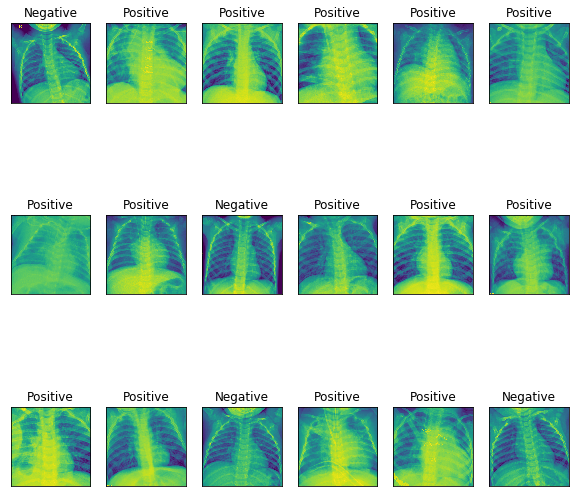

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
class_labels = ['Negative', 'Positive']
plt.figure(figsize=(10,10))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.title(class_labels[Y_train[i]])
    plt.imshow(X_train[i])

In [74]:
df = pd.read_csv('/Users/dwei/Desktop/562468_1022626_bundle_archive/Chest_xray_Corona_Metadata.csv',sep=r'\s*,\s*',engine = 'python', na_values = '?')
metadata =df.values
repo = "/Users/dwei/Desktop/562468_1022626_bundle_archive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train/"

Covid_train = []
Y_Covid_train = []

for i in metadata:
    if(i[3] == "TEST"):
        break
    image = Image.open(repo+i[1])
    if image.size[0] >=500 and image.size[1] >= 500:
        img = resizeimage.resize_cover(image, [500, 500])
        array = np.array(img)
        if len(array.shape) != 2:
            array = array[:,:,0]
        Covid_train.append(array) 
        x = 0 if i[2]=="Normal" else 1
        Y_Covid_train.append(x)
        

In [75]:
len(Covid_train)

5028

In [76]:
len(Y_Covid_train)

5028

In [77]:
Covid_train[0].shape

(500, 500)

In [78]:
Covid_train[1].shape

(500, 500)

In [79]:
Covid_train[2].max()

255

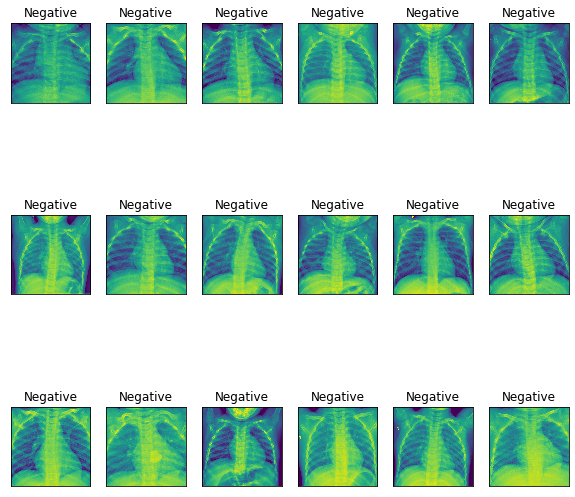

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(class_labels[Y_Covid_train[i]])
    plt.imshow(Covid_train[i])

In [81]:
X_train = X_train + Covid_train
Y_train = Y_train + Y_Covid_train
X_train, Y_train = shuffle(X_train, Y_train, random_state=0)

In [82]:
np.save('../X_train.npy', X_train)
np.save('../Y_train.npy', Y_train)

In [49]:
dir = os.listdir('/Users/dwei/Desktop/chest_xray/test')
X_test_normal = []
for i in os.listdir('/Users/dwei/Desktop/chest_xray/test/NORMAL'):
    img = resizeimage.resize_cover(Image.open('/Users/dwei/Desktop/chest_xray/test/NORMAL/{}'.format(i)), [500, 500])
    array = np.array(img)
    if len(array.shape) != 2:
        array = array[:,:,0]
    X_test_normal.append(array)
Y_test_normal = [0]*len(X_test_normal)
print(len(X_test_normal))

X_test_pneumonia = []
for i in os.listdir('/Users/dwei/Desktop/chest_xray/test/PNEUMONIA'):
    image = Image.open('/Users/dwei/Desktop/chest_xray/test/PNEUMONIA/{}'.format(i))
    if image.size[0] >=500 and image.size[1] >= 500:
        img = resizeimage.resize_cover(image, [500, 500])
        array = np.array(img)
        if len(array.shape) != 2:
            array = array[:,:,0]
        X_test_pneumonia.append(array/array.max())
Y_test_pneumonia = [1]*len(X_test_pneumonia)
print(len(X_test_pneumonia))

255
255
227
254
227
255
219
254
207
255
255
253
255
250
185
255
255
210
255
255
255
255
255
255
255
255
243
248
255
255
255
255
225
255
255
255
255
253
255
255
255
255
254
239
255
255
251
255
231
255
255
255
254
229
243
255
228
241
249
255
255
255
255
235
222
236
255
255
246
255
255
255
215
255
255
255
226
255
234
255
255
255
228
255
255
255
238
253
236
255
255
255
255
255
255
255
252
254
244
243
244
158
255
255
255
255
234
255
228
218
225
255
253
255
255
251
254
208
255
255
249
222
255
255
240
255
255
255
229
255
255
255
246
252
222
255
255
255
239
241
242
235
255
243
255
255
248
212
255
254
233
248
250
223
254
255
242
255
248
213
235
243
241
230
255
242
255
255
247
255
231
255
255
223
255
230
255
255
252
255
255
255
255
255
255
255
254
253
220
246
255
252
224
249
223
216
255
251
255
226
255
255
243
255
212
246
210
252
241
239
227
255
208
225
255
225
255
255
255
248
255
232
255
243
255
211
255
255
213
255
207
255
211
255
234
373


In [41]:
Y_test = Y_test_normal + Y_test_pneumonia
print(len(Y_test))
X_test = X_test_normal + X_test_pneumonia
print(len(X_test))
X_test, Y_test = shuffle(X_test, Y_test, random_state=0)

607
607


In [42]:
df = pd.read_csv('/Users/dwei/Desktop/562468_1022626_bundle_archive/Chest_xray_Corona_Metadata.csv',sep=r'\s*,\s*',engine = 'python', na_values = '?')
metadata =df.values
repo = "/Users/dwei/Desktop/562468_1022626_bundle_archive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test/"

Covid_test = []
Y_Covid_test = []

for i in metadata:
    if(i[3] == "TEST"):
        image = Image.open(repo+i[1])
        if image.size[0] >=500 and image.size[1] >= 500:
            img = resizeimage.resize_cover(image, [500, 500])
            array = np.array(img)
            if len(array.shape) != 2:
                array = array[:,:,0]
            Covid_test.append(array) 
            x = 0 if i[2]=="Normal" else 1
            Y_Covid_test.append(x)
        

In [43]:
X_test = X_test + Covid_test
Y_test = Y_test + Y_Covid_test
X_test, Y_test = shuffle(X_test, Y_test, random_state=0)

In [44]:
np.save('../X_test.npy', X_test)
np.save('../Y_test.npy', Y_test)